<h1>NBA Shooting Analysis</h1>

In [7]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cluster import KMeans
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

from nba_api.stats.static import teams,players
teams=teams.get_teams()
nba_players = players.get_players()

from nba_api.stats.library.parameters import SeasonAll
import matplotlib as mpl
import json
import requests

In [18]:
nba_players

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [19]:
pd.DataFrame(teams)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


<h1>Analysing Relationship between PPG and FG% of players for shooting analysis</h1>

In [20]:
#Getting the league leaders of current season
data = endpoints.leagueleaders.LeagueLeaders(season='2021-22') 
df = data.league_leaders.get_data_frame()

df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629027,1,Trae Young,ATL,76,2652,711,1544,0.460,233,...,284,737,72,7,303,128,2155,2066,2.43,0.24
1,201942,2,DeMar DeRozan,CHI,76,2743,774,1535,0.504,50,...,392,374,68,24,181,178,2118,1961,2.07,0.38
2,203954,3,Joel Embiid,PHI,68,2296,666,1334,0.499,93,...,796,284,77,99,214,181,2079,2304,1.33,0.36
3,1628369,4,Jayson Tatum,BOS,76,2731,708,1564,0.453,230,...,609,334,75,49,217,174,2046,1971,1.54,0.35
4,203999,5,Nikola Jokic,DEN,74,2476,764,1311,0.583,97,...,1019,584,109,63,281,191,2004,2862,2.08,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1630207,582,Nate Hinton,IND,2,2,0,1,0.000,0,...,0,0,0,0,1,0,0,-2,0.00,0.00
601,1626155,582,Sam Dekker,TOR,1,1,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00
602,1629309,582,Trayvon Palmer,DET,1,17,0,1,0.000,0,...,2,0,0,0,1,2,0,0,0.00,0.00
603,1629788,582,Tyler Hall,NYK,1,2,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00


In [21]:
#Getting PPG(Points per game) and FGA (Field Goal Attempts)
x, y = df.FGA/df.GP, df.PTS/df.GP 

x = np.array(x).reshape(-1,1) 
y = np.array(y).reshape(-1,1) 

In [22]:
#Using data in Linear Regression Model
model = linear_model.LinearRegression()   
model.fit(x,y)                          

r2 = round(model.score(x,y), 2)           
predicted_y = model.predict(x)

Text([13.61764706], [29.57352941], 'Joel Embiid')

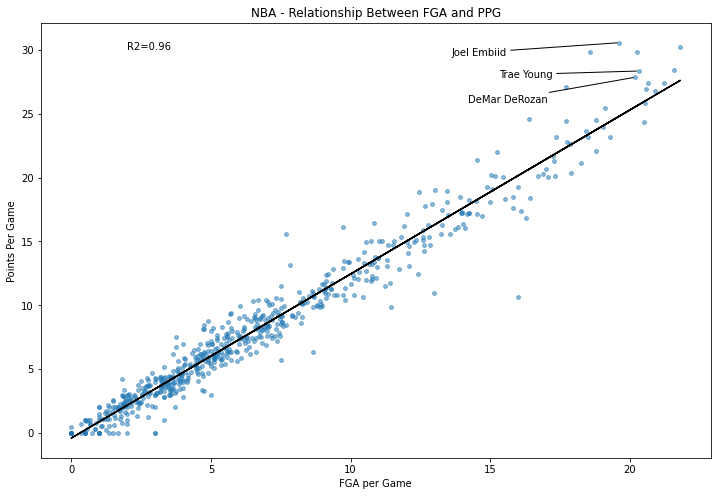

In [23]:
#Plotting PPG Vs FGA 
#Also marking top 3 players with highest number of points
plt.figure(figsize=(12,8))
plt.scatter(x, y, s=15, alpha=.5)                           
plt.plot(x, predicted_y, color = 'black')                   
plt.title('NBA - Relationship Between FGA and PPG')         
plt.xlabel('FGA per Game')                                  
plt.ylabel('Points Per Game')                                
plt.text(2,30, f'R2={r2}')                                  


plt.annotate(df.PLAYER[0],                       
             (x[0], y[0]),                         
             (x[0]-5,y[0]-0.5),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[1],                       
             (x[1], y[1]),                         
             (x[1]-6,y[1]-2),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[2],                       
             (x[2], y[2]),                         
             (x[2]-6,y[2]-1),                    
             arrowprops=dict(arrowstyle='-'))

We can see that,Elite Players with High efficiency are allowed to take more shooting attempts and hence result to higher points scored per game.

<h1>Making a Shot Chart for individual shooting analysis</h1>

In [24]:
#Getting Team ID
team_id= [team_id for team_id in teams
         if team_id['full_name'] == 'Golden State Warriors'][0]['id']
team_id

1610612744

In [25]:
#Getting Player ID
player_id= [player_id for player_id in nba_players
         if player_id['full_name'] == 'Stephen Curry'][0]['id']
player_id

201939

In [26]:
from nba_api.stats.endpoints import shotchartdetail

# Create JSON request for Stephen Curry (My favourite Player) shot Chart Details

shot_json = shotchartdetail.ShotChartDetail(team_id=team_id,
            player_id = player_id,
            context_measure_simple = 'PTS',
            season_nullable = '2021-22',
            season_type_all_star = 'Regular Season')

In [27]:
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [28]:
# Create pandas DataFrame
player_data = pd.DataFrame(rows)
player_data.columns = headers
player_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100002,37,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,10,...,Left Side Center(LC),24+ ft.,25,-165,189,1,1,20211019,LAL,GSW
1,Shot Chart Detail,0022100002,176,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,27,...,Center(C),Less Than 8 ft.,2,-7,29,1,1,20211019,LAL,GSW
2,Shot Chart Detail,0022100002,352,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,29,...,Center(C),Less Than 8 ft.,1,-1,10,1,1,20211019,LAL,GSW
3,Shot Chart Detail,0022100002,510,201939,Stephen Curry,1610612744,Golden State Warriors,3,2,23,...,Center(C),Less Than 8 ft.,1,7,8,1,1,20211019,LAL,GSW
4,Shot Chart Detail,0022100002,642,201939,Stephen Curry,1610612744,Golden State Warriors,4,5,34,...,Center(C),24+ ft.,26,48,260,1,1,20211019,LAL,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Shot Chart Detail,0022101025,567,201939,Stephen Curry,1610612744,Golden State Warriors,4,5,8,...,Center(C),Less Than 8 ft.,6,-59,11,1,1,20220314,GSW,WAS
531,Shot Chart Detail,0022101025,581,201939,Stephen Curry,1610612744,Golden State Warriors,4,4,34,...,Center(C),24+ ft.,25,-18,258,1,1,20220314,GSW,WAS
532,Shot Chart Detail,0022101025,589,201939,Stephen Curry,1610612744,Golden State Warriors,4,3,58,...,Right Side Center(RC),24+ ft.,25,228,110,1,1,20220314,GSW,WAS
533,Shot Chart Detail,0022101025,593,201939,Stephen Curry,1610612744,Golden State Warriors,4,3,14,...,Center(C),Less Than 8 ft.,4,-42,16,1,1,20220314,GSW,WAS


In [29]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [30]:
playerkmeans=player_data[['LOC_X','LOC_Y']]
km_res=KMeans(n_clusters=6).fit(playerkmeans)
y_kmeans = km_res.predict(playerkmeans)
clusters=km_res.cluster_centers_
clusters

array([[ 189.26785714,  108.58928571],
       [   2.20103093,   28.90206186],
       [  -0.85714286,  253.98571429],
       [-151.45045045,  208.45045045],
       [ 125.66666667,  239.15384615],
       [-203.        ,   45.96153846]])

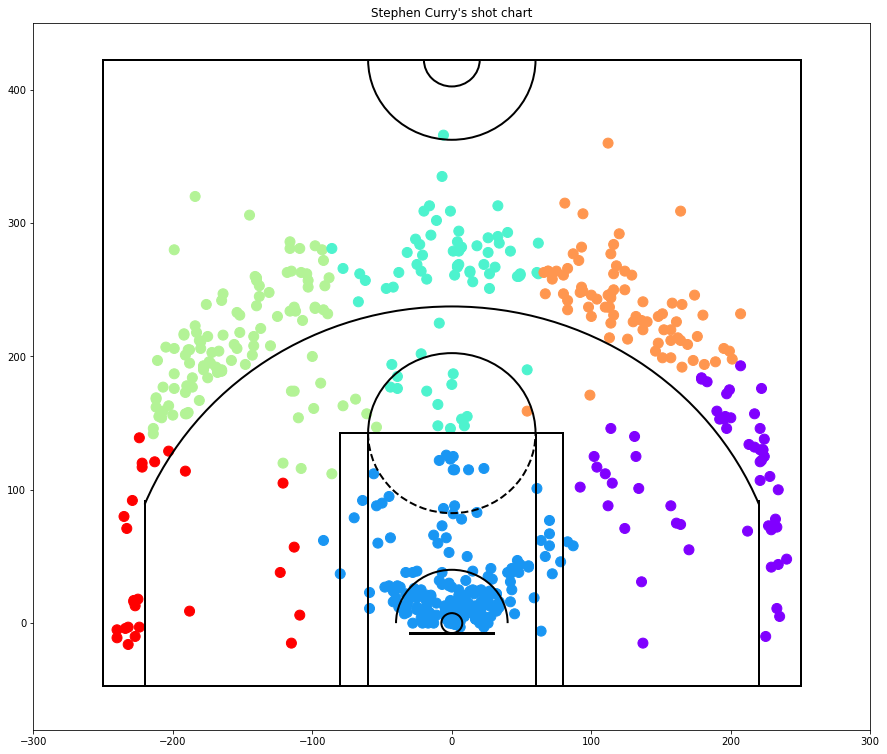

In [31]:
fig = plt.figure(figsize=(15,13))
plt.scatter(data=playerkmeans,x='LOC_X',y='LOC_Y',c=y_kmeans,s=100,cmap='rainbow')
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-80,450)

plt.title("S's shot chart")
plt.show()

In [44]:
#Let's look at Joel Embiid's shot Chart

#Getting Team ID
team_id_2= [team_id for team_id in teams
         if team_id['full_name'] == 'Philadelphia 76ers'][0]['id']
team_id_2 

#Getting Player ID
player_id_2= [player_id for player_id in nba_players
         if player_id['full_name'] == 'Joel Embiid'][0]['id']
player_id_2

203954

In [45]:
shot_json_2 = shotchartdetail.ShotChartDetail(team_id=team_id_2,
            player_id = player_id_2,
            context_measure_simple = 'PTS',
            season_nullable = '2021-22',
            season_type_all_star = 'Regular Season')

shot_data_2 = json.loads(shot_json_2.get_json())

# Get the relevant data from our dictionary
relevant_data_2 = shot_data_2['resultSets'][0]

# Get the headers and row data
headers_2 = relevant_data_2['headers']
rows_2 = relevant_data_2['rowSet']

# Create pandas DataFrame
player_data_2 = pd.DataFrame(rows_2)
player_data_2.columns = headers_2
player_data_2

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100009,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,42,...,Center(C),8-16 ft.,15,12,155,1,1,20211020,NOP,PHI
1,Shot Chart Detail,0022100009,24,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,9,41,...,Center(C),24+ ft.,25,1,255,1,1,20211020,NOP,PHI
2,Shot Chart Detail,0022100009,41,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,8,5,...,Right Side Center(RC),24+ ft.,24,180,159,1,1,20211020,NOP,PHI
3,Shot Chart Detail,0022100009,43,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,7,22,...,Center(C),Less Than 8 ft.,2,22,8,1,1,20211020,NOP,PHI
4,Shot Chart Detail,0022100009,311,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,0,39,...,Center(C),Less Than 8 ft.,2,-5,22,1,1,20211020,NOP,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Shot Chart Detail,0022101214,488,203954,Joel Embiid,1610612755,Philadelphia 76ers,3,2,48,...,Center(C),Less Than 8 ft.,1,-11,11,1,1,20220409,PHI,IND
662,Shot Chart Detail,0022101214,497,203954,Joel Embiid,1610612755,Philadelphia 76ers,3,2,9,...,Center(C),8-16 ft.,14,-29,138,1,1,20220409,PHI,IND
663,Shot Chart Detail,0022101214,511,203954,Joel Embiid,1610612755,Philadelphia 76ers,3,1,27,...,Center(C),8-16 ft.,15,-7,155,1,1,20220409,PHI,IND
664,Shot Chart Detail,0022101214,588,203954,Joel Embiid,1610612755,Philadelphia 76ers,4,8,5,...,Center(C),8-16 ft.,11,-27,111,1,1,20220409,PHI,IND


In [46]:
playerkmeans_2=player_data_2[['LOC_X','LOC_Y']]
km_res=KMeans(n_clusters=6).fit(playerkmeans_2)
y_kmeans_2 = km_res.predict(playerkmeans_2)
clusters_2=km_res.cluster_centers_
clusters_2

array([[  -2.15151515,   13.23333333],
       [ -20.20353982,  139.88495575],
       [-117.76086957,  224.60869565],
       [  94.64705882,   82.80392157],
       [  67.51111111,  235.22222222],
       [-126.37037037,   57.03703704]])

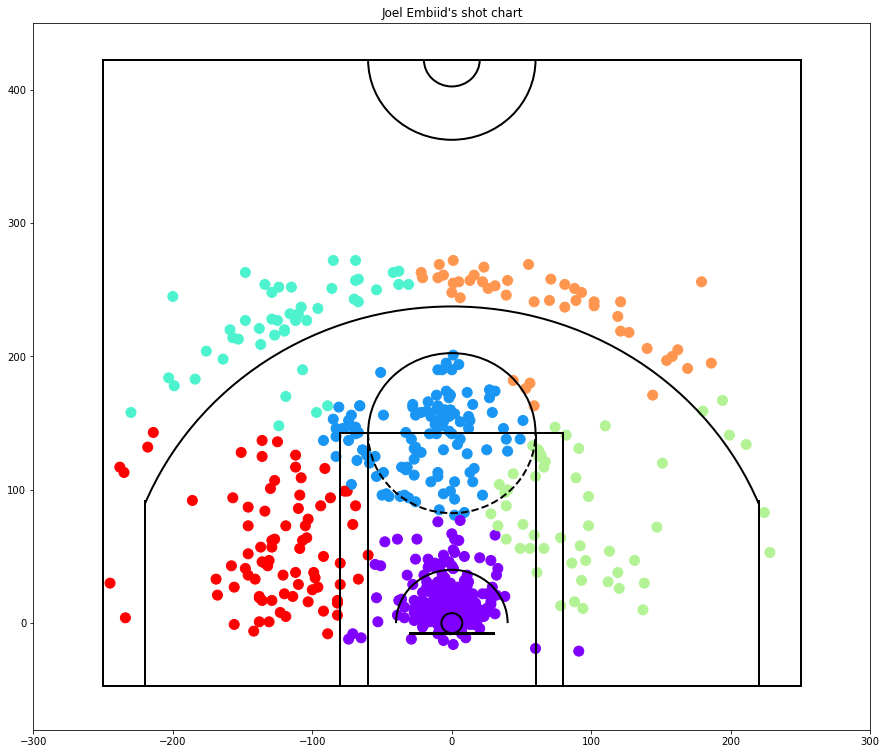

In [48]:
fig = plt.figure(figsize=(15,13))
plt.scatter(data=playerkmeans_2,x='LOC_X',y='LOC_Y',c=y_kmeans_2,s=100,cmap='rainbow')
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-80,450)

plt.title("Joel Embiid's shot chart")
plt.show()